# Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib
import matplotlib.pyplot as plt

# Merging the data into a single dataframe

In [2]:
data = pd.ExcelFile(r"C:\Users\jvarshitha\Downloads\Analytics_Problem_Statment_Dataset (1).xlsx")
df1 = pd.read_excel(data, 'Usage')
print('shape of dataset',df1.shape)
df2 = pd.read_excel(data, 'Cost')
print('shape of dataset',df2.shape)
df3=pd.read_excel(data,'Issues')
print("Shape of Dataset:", df3.shape)
df3.head()

shape of dataset (200, 3)
shape of dataset (200, 2)
Shape of Dataset: (200, 2)


,Customer No,Average Issues per Month
0,106,3
1,144,15
2,64,17
3,114,0
4,62,18


In [3]:
finaldf1=pd.merge(df1,df2, how='inner',on='Customer No')
print(finaldf1.shape)
finaldf1.head()

(200, 4)


,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $
0,1,76,100,100
1,2,85,100,100
2,3,89,100,100
3,4,21,100,100
4,5,24,100,100


In [4]:
finaldf=pd.merge(finaldf1,df3,how='inner',on='Customer No')
print(finaldf.shape)
finaldf.head()

(200, 5)


,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month
0,1,76,100,100,5
1,2,85,100,100,18
2,3,89,100,100,11
3,4,21,100,100,1
4,5,24,100,100,12


In [5]:
finaldf

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month
0,1,76,100,100,5
1,2,85,100,100,18
2,3,89,100,100,11
3,4,21,100,100,1
4,5,24,100,100,12
...,...,...,...,...,...
195,196,216,300,300,0
196,197,196,300,300,12
197,198,300,300,300,12
198,199,293,300,300,10


In [6]:
finaldf.to_csv('FinalData.csv', index=False)

In [7]:
finaldf.describe()

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month
count,200.000000,200.0000,200.000000,200.000000,200.000000
mean,100.500000,115.7350,187.500000,187.500000,9.825000
std,57.879185,75.1617,74.136571,74.136571,6.090967
min,1.000000,10.0000,100.000000,100.000000,0.000000
25%,50.750000,56.0000,137.500000,137.500000,5.000000
50%,100.500000,98.0000,175.000000,175.000000,10.000000
75%,150.250000,163.2500,225.000000,225.000000,15.000000
max,200.000000,300.0000,300.000000,300.000000,20.000000


In [8]:
print(finaldf['Plan Cost in $'].unique().tolist()) #dataset has 4 different kind of plans

[100, 150, 200, 300]


<AxesSubplot:xlabel='Plan Cost in $', ylabel='count'>

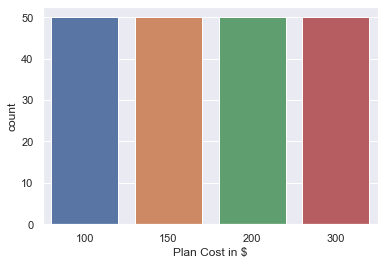

In [9]:
sns.countplot(x = 'Plan Cost in $',data = finaldf)

In [10]:
temp=list(finaldf['Total Monthly Limit in gb']-finaldf['Average Monthly Usage in gb'])
print(temp)

[24, 15, 11, 79, 76, 7, 78, 53, 83, 68, 51, 74, 88, 80, 84, 79, 78, 36, 44, 28, 83, 35, 36, 73, 11, 38, 90, 83, 86, 56, 40, 3, 14, 13, 21, 15, 36, 74, 12, 49, 8, 15, 68, 11, 47, 62, 61, 7, 30, 26, 37, 58, 49, 103, 117, 95, 57, 10, 121, 110, 27, 50, 31, 97, 34, 57, 121, 83, 113, 65, 79, 138, 95, 113, 30, 134, 55, 4, 113, 85, 94, 69, 60, 112, 140, 126, 55, 111, 36, 13, 128, 90, 45, 63, 9, 134, 124, 114, 69, 32, 102, 144, 119, 2, 62, 37, 0, 93, 10, 11, 65, 96, 56, 22, 39, 146, 125, 140, 96, 72, 69, 11, 113, 117, 123, 47, 59, 76, 92, 97, 5, 43, 117, 24, 51, 31, 148, 27, 36, 70, 87, 26, 119, 87, 112, 48, 39, 112, 102, 27, 50, 77, 93, 158, 177, 86, 18, 121, 42, 43, 59, 189, 197, 179, 68, 92, 53, 39, 160, 89, 1, 36, 109, 97, 198, 178, 7, 5, 156, 6, 118, 89, 153, 71, 55, 188, 17, 83, 92, 136, 0, 97, 147, 105, 192, 84, 104, 0, 7, 36]


In [11]:
finaldf.insert(3,'Left GB',temp)
finaldf

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Plan Cost in $,Average Issues per Month
0,1,76,100,24,100,5
1,2,85,100,15,100,18
2,3,89,100,11,100,11
3,4,21,100,79,100,1
4,5,24,100,76,100,12
...,...,...,...,...,...,...
195,196,216,300,84,300,0
196,197,196,300,104,300,12
197,198,300,300,0,300,12
198,199,293,300,7,300,10


<AxesSubplot:>

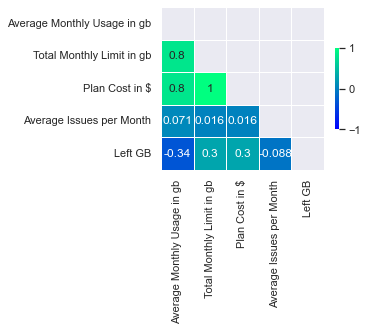

In [12]:
continous_variables = ["Average Monthly Usage in gb", "Total Monthly Limit in gb", "Plan Cost in $", "Average Issues per Month","Left GB"]

# Creating a dataframe for these continuous variables
df_cont = finaldf[continous_variables]

# Computing the correlation matrix
corr = df_cont.corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 3))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="winter", vmax=1,vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [13]:
# corrmat = finaldf.corr()
# top_corr_features = corrmat.index
# g=sns.heatmap(finaldf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
# happydf=finaldf[finaldf['Average Issues per Month']  <= threshold]
# happydf

In [15]:
temp1=(finaldf['Left GB'])/finaldf['Total Monthly Limit in gb']
temp2=[int(i*100) for i in temp1]#list comprehension

In [16]:
print(temp2)

[24, 15, 11, 79, 76, 7, 78, 53, 83, 68, 51, 74, 88, 80, 84, 79, 78, 36, 44, 28, 83, 35, 36, 73, 11, 38, 90, 83, 86, 56, 40, 3, 14, 13, 21, 15, 36, 74, 12, 49, 8, 15, 68, 11, 47, 62, 61, 7, 30, 26, 24, 38, 32, 68, 78, 63, 38, 6, 80, 73, 18, 33, 20, 64, 22, 38, 80, 55, 75, 43, 52, 92, 63, 75, 20, 89, 36, 2, 75, 56, 62, 46, 40, 74, 93, 84, 36, 74, 24, 8, 85, 60, 30, 42, 6, 89, 82, 76, 46, 21, 51, 72, 59, 1, 31, 18, 0, 46, 5, 5, 32, 48, 28, 11, 19, 73, 62, 70, 48, 36, 34, 5, 56, 58, 61, 23, 29, 38, 46, 48, 2, 21, 58, 12, 25, 15, 74, 13, 18, 35, 43, 13, 59, 43, 56, 24, 19, 56, 51, 13, 16, 25, 31, 52, 59, 28, 6, 40, 14, 14, 19, 63, 65, 59, 22, 30, 17, 13, 53, 29, 0, 12, 36, 32, 66, 59, 2, 1, 52, 2, 39, 29, 51, 23, 18, 62, 5, 27, 30, 45, 0, 32, 49, 35, 64, 28, 34, 0, 2, 12]


# Adding the remaning GB into new column in terms of percent

In [17]:
finaldf.insert(4,'Left GB in percent',temp2)
finaldf

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
0,1,76,100,24,24,100,5
1,2,85,100,15,15,100,18
2,3,89,100,11,11,100,11
3,4,21,100,79,79,100,1
4,5,24,100,76,76,100,12
...,...,...,...,...,...,...,...
195,196,216,300,84,28,300,0
196,197,196,300,104,34,300,12
197,198,300,300,0,0,300,12
198,199,293,300,7,2,300,10


In [18]:
threshold=int(input('Enter threshold for happy customers:'))

Enter threshold for happy customers:0


In [19]:
happydf=finaldf[((finaldf['Average Issues per Month']<=5) & (finaldf['Left GB in percent']<=10)) | (finaldf['Average Issues per Month']  <= threshold)]

In [20]:
happydf.describe()

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,114.176471,142.823529,202.941176,60.117647,29.000000,202.941176,0.647059
std,56.318553,69.676247,75.974067,55.006684,24.766409,75.974067,1.411612
min,18.000000,39.000000,100.000000,2.000000,1.000000,100.000000,0.000000
25%,80.000000,75.000000,150.000000,11.000000,8.000000,150.000000,0.000000
50%,117.000000,153.000000,200.000000,36.000000,23.000000,200.000000,0.000000
75%,154.000000,195.000000,300.000000,85.000000,52.000000,300.000000,0.000000
max,196.000000,264.000000,300.000000,158.000000,72.000000,300.000000,5.000000


# list of happy customers

In [21]:
happydf

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
17,18,64,100,36,36,100,0
31,32,97,100,3,3,100,1
40,41,92,100,8,8,100,3
46,47,39,100,61,61,100,0
79,80,65,150,85,56,150,0
101,102,56,200,144,72,200,0
103,104,198,200,2,1,200,0
113,114,178,200,22,11,200,0
116,117,75,200,125,62,200,0
121,122,189,200,11,5,200,5


In [22]:
notsohappy=finaldf[~(((finaldf['Average Issues per Month']<=5) & (finaldf['Left GB in percent']<=10)) | (finaldf['Average Issues per Month']  <= 0))]

# List of not so happy customers

In [23]:
notsohappy

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
0,1,76,100,24,24,100,5
1,2,85,100,15,15,100,18
2,3,89,100,11,11,100,11
3,4,21,100,79,79,100,1
4,5,24,100,76,76,100,12
...,...,...,...,...,...,...,...
194,195,108,300,192,64,300,15
196,197,196,300,104,34,300,12
197,198,300,300,0,0,300,12
198,199,293,300,7,2,300,10


In [24]:
# notsohappydf=finaldf[finaldf['Average Issues per Month']>threshold]
# notsohappy

In [25]:
finaldf.sum(axis=0) #revenue=37,500

Customer No                    20100
Average Monthly Usage in gb    23147
Total Monthly Limit in gb      37500
Left GB                        14353
Left GB in percent              8190
Plan Cost in $                 37500
Average Issues per Month        1965
dtype: int64

In [26]:
finaldf['Customer No'].count()

200

In [27]:
Total_Revenue=int(finaldf.sum(axis=0)['Plan Cost in $'])
'{:,}'.format(Total_Revenue)

'37,500'

The total revenue made is $37,500

In [28]:
temp=set(finaldf['Plan Cost in $'].nlargest(10))
temp=list(temp.union({1000}))
temp

[1000, 300]

Higher revenue plans can be sold to cutomers who can afford it

List of such customers is given below

In [29]:
# highrevdf=finaldf[finaldf['Plan Cost in $'] is in temp]
highrevdf=finaldf[finaldf['Plan Cost in $'].isin(temp)]
highrevdf

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
150,151,250,300,50,16,300,12
151,152,223,300,77,25,300,2
152,153,207,300,93,31,300,20
153,154,142,300,158,52,300,0
154,155,123,300,177,59,300,15
155,156,214,300,86,28,300,9
156,157,282,300,18,6,300,15
157,158,179,300,121,40,300,4
158,159,258,300,42,14,300,12
159,160,257,300,43,14,300,3


In [30]:
type(highrevdf)

pandas.core.frame.DataFrame

In [31]:
LessGBusage=finaldf[finaldf['Left GB in percent']>50]

In [32]:
Revenue_lessGb=LessGBusage.sum(axis=0)['Plan Cost in $']
'{:,}'.format(Revenue_lessGb)

'12,800'

In [33]:
Revenue_lessGb/Total_Revenue*100

34.13333333333333

There are cutomers who are opting to buy high GB but use less. The revenue made from such customers is almost 34% of the total revenue made.

<AxesSubplot:xlabel='Average Issues per Month', ylabel='count'>

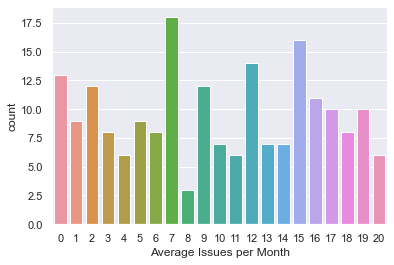

In [34]:
sns.countplot(x = 'Average Issues per Month',data = finaldf)

In [35]:
Support_highly_needed=finaldf[finaldf['Average Issues per Month']>=15.000000] #Q3(3rd quartile deviation) is "15.000000"

In [36]:
need_high_support=list(Support_highly_needed['Customer No'])
print('The following customers need immediate support:',need_high_support,len(need_high_support),'customers need immediate support')

The following customers need immediate support: [2, 6, 13, 19, 23, 27, 33, 34, 35, 38, 40, 42, 46, 59, 62, 64, 65, 69, 76, 78, 79, 83, 87, 91, 92, 97, 101, 103, 105, 107, 115, 116, 125, 129, 130, 132, 136, 138, 142, 143, 144, 145, 147, 153, 155, 157, 164, 165, 167, 168, 169, 170, 174, 177, 178, 180, 183, 190, 191, 194, 195] 61 customers need immediate support


In [37]:
RevenueSHNC=int(Support_highly_needed.sum(axis=0)['Plan Cost in $'])#12050
'{:,}'.format(RevenueSHNC)

'12,050'

In [38]:
RevenueSHNC/Total_Revenue*100

32.13333333333333

32 percent of revenue generated from the customers who need immediate support

In [39]:
finaldf.describe()

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
count,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,115.7350,187.500000,71.765000,40.950000,187.500000,9.825000
std,57.879185,75.1617,74.136571,47.148965,25.736537,74.136571,6.090967
min,1.000000,10.0000,100.000000,0.000000,0.000000,100.000000,0.000000
25%,50.750000,56.0000,137.500000,36.000000,19.000000,137.500000,5.000000
50%,100.500000,98.0000,175.000000,69.000000,38.000000,175.000000,10.000000
75%,150.250000,163.2500,225.000000,102.250000,62.000000,225.000000,15.000000
max,200.000000,300.0000,300.000000,198.000000,93.000000,300.000000,20.000000


# List of customers who can upgrade their plan

In [40]:
#Cutomers - plan upgradation suggestion
planupgrade=finaldf[finaldf['Left GB'] <= 5]
#&& finaldf['Average Issues per Month'] <= 0
planupgrade

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
31,32,97,100,3,3,100,1
77,78,146,150,4,2,150,15
103,104,198,200,2,1,200,0
106,107,200,200,0,0,200,20
130,131,195,200,5,2,200,2
170,171,299,300,1,0,300,14
177,178,295,300,5,1,300,18
190,191,300,300,0,0,300,18
197,198,300,300,0,0,300,12


In [41]:
planupgrade.count()['Customer No']

9

In [42]:
Revenue_expected=0

In [43]:
tempdf1=planupgrade[planupgrade['Total Monthly Limit in gb']==100]
Revenue_expected+=(tempdf1.count()['Customer No'])*200
tempdf1

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
31,32,97,100,3,3,100,1


In [44]:
tempdf2=planupgrade[planupgrade['Total Monthly Limit in gb']==150]
Revenue_expected+=(tempdf2.count()['Customer No'])*150
tempdf2

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
77,78,146,150,4,2,150,15


In [45]:
tempdf3=planupgrade[planupgrade['Total Monthly Limit in gb']==200]
Revenue_expected+=(tempdf3.count()['Customer No'])*100
tempdf3

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
103,104,198,200,2,1,200,0
106,107,200,200,0,0,200,20
130,131,195,200,5,2,200,2


In [46]:
Revenue_expected

650

In [47]:
Revenue_expected/Total_Revenue*100

1.7333333333333332

There is a scope for increase in the revenue by 1.74 percent 

In [48]:
planupgrade[planupgrade['Total Monthly Limit in gb']==300]

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Left GB,Left GB in percent,Plan Cost in $,Average Issues per Month
170,171,299,300,1,0,300,14
177,178,295,300,5,1,300,18
190,191,300,300,0,0,300,18
197,198,300,300,0,0,300,12
